## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Imports and Opening CSV

In [85]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# import geopandas as gpd
# from shapely.geometry import Point,Polygon
# import descartes

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Start of Data Cleaning
To do: 

'date' needs to be changed from string to datetime 

'waterfront'   needs null values filled

'view'        

'yr_renovated' 

'sqft_basement' needs to be changed from string to float 

In [4]:
df_clean = df.copy()

In [5]:
# changing 'date' column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
# examining the 'waterfront' null entries
df_clean['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [7]:
# i assume here that na means 0
df_clean['waterfront'].fillna(0, inplace=True)
df_clean['waterfront'].isna().sum()

0

In [8]:
# examining the 'view' null entries
df_clean['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
# i assume here that na means 0
df_clean['view'].fillna(0, inplace=True)
df_clean['view'].isna().sum()

0

In [10]:
# examining 'yr_renovated' null entries
df_clean['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
# i assume here that na means 0
df_clean['yr_renovated'].fillna(0, inplace=True)
df_clean['yr_renovated'].isna().sum()

0

In [12]:
# examining 'sqft_basement' string values
df_clean['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
2300.0        1
2390.0        1
768.0         1
266.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [13]:
# replacing strings with floats
df_clean['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace = True)

In [14]:
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

In [15]:
df_clean['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1816.0        1
2720.0        1
1008.0        1
2250.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [16]:
# checking to make sure we cleaned all the columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [17]:
# save the cleaned csv back into our data folder
df_clean.to_csv('data/kc_house_data_clean.csv', index=False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### End of Data Cleaning

## Overall Cleaned Preliminary Model
Just to take a look at what we have so far and if any insights jump out

In [18]:
multiple_formula = 'price ~' + ' + '.join(df_clean.columns[3:])
multiple_model = ols(multiple_formula, df_clean).fit()
multiple_summary = multiple_model.summary()

multiple_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.656e+06   2.93e+06      2.271      0.023    9.12e+05    1.24e+07
bedrooms      -3.589e+04   1900.636    -18.882      0.000   -3.96e+04   -3.22e+04
bathrooms      4.162e+04   3262.735     12.755      0.000    3.52e+04     4.8e+04
sqft_living     102.8320     18.076      5.689      0.000      67.401     138.263
sqft_lot          0.1281      0.048      2.673      0.008       0.034       0.222
floors         7000.6499   3600.684      1.944      0.052     -56.956    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.329e+04   2122.073     25.111      0.000    4.91e+04    5.74e+04
condition      2.685e+04   2346.458     11.443      0.000    2.23e+04    3.15e+04
grade          9.691e+04   2160.604     44.853      0.000    9.27e+04    1.01e+05
sqft_above       78.0057     18.067      4.318      0.000      42.593     113.419
sqft_basement    47.6352     17.907      2.660      0.008      12.537      82.734
yr_built      -2637.5367     71.932    -36.667      0.000   -2778.528   -2496.545
yr_renovated     23.5856      3.977      5.930      0.000      15.790      31.381
zipcode        -584.4582     32.991    -17.716      0.000    -649.122    -519.794
lat            6.007e+05   1.07e+04     55.939      0.000     5.8e+05    6.22e+05
long          -2.177e+05   1.32e+04    -16.546      0.000   -2.43e+05   -1.92e+05
sqft_living15    21.5139      3.451      6.235      0.000      14.751      28.277
sqft_lot15       -0.3877      0.073     -5.285      0.000      -0.531      -0.244
==============================================================================
Omnibus:                    18343.380   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1833646.592
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      47.575   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# FSM
First Simple Model

Just a quick first model based on the correlations we see above. Working with **price** and **sqft_living**

In [19]:
# look at correlations to find a starting point for our FSM
df_clean.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Null Hypothesis: Square footage does not affect price

Alternate Hypothesis: Square footage does affect price

alpha = 0.05

In [20]:
# start of fsm (first simple model)
# in this case it seems like it will be sqft_living

formula = 'price ~ sqft_living'
df_fsm = ols(formula, df_clean).fit()
df_fsm_summ = df_fsm.summary()
df_fsm_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We reject the null hypothesis that square footage does not affect price. The p-value is 0, which is less than alpha of 0.05

## Start here for adding features!

### Functions

We are going to be adding different features to test how they work together to get the best model add idea on how they work together. Since we are goint to be adding different features we are going to be making a few some functions. One for adding simple festures and one for categorical festures. We will be testing out these features with are FSM, so the FSM will need to be in the modal for easier use. We want to keep track of all R-Squared Scores that we will be getting so we will use a one more function to do so.

In [21]:
def model_tests(model_formula, df):
    '''
    Simple feature adding model.
    
    
    '''
    formula = 'price ~ sqft_living + ' + model_formula
    model = ols(formula, df).fit()
    model_summary = model.summary()
    return model_summary

In [22]:
def dummy_model(column, df):
    '''
    Categorical feature adding model.
    
    column = Name of Categorical column.
    
    df = dataframe name.
    '''
    dummy = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df_dummy = pd.concat([df, dummy], axis=1)
    dummy_formula = ''
    dummy_formula = ' + '.join(df_dummy.columns[-((len(df[column].value_counts())-1)):])
    formula = 'price ~ sqft_living + ' + dummy_formula
    model = ols(formula, df_dummy).fit()
    model_summary = model.summary()
    return model_summary

In [61]:
R_2_dict = {}

def add_R_2(model_name, r_2, p_value):
    '''
    R-squared tracker.
    
    model_name = Name of modal that you are adding.
    
    r_2 = Value of the modals's R-squared.
    '''
    R_2_dict[model_name] = r_2, p_value
    
    df_r_2 = pd.DataFrame(list(R_2_dict.items()), columns = ['Name', 'R-squared'])
    return df_r_2

Now that we have are functions declared let add R-squared from our FSM.

In [62]:
add_R_2('FSM', 0.493, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"


### Features Testing

Let start testing some features and see what we get. The first two features we are testing are categorical columns so we will need to use are dummy model function, and add them to are R-squared tracker.

Do the features effect the price in a significant way?  
-Null: These features do not effect the price in a significant way?  

-Alt: These features do effect the price in a significant way?

#### Grade and Condition Models

In [25]:
dummy_model('grade', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2730.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9798e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21585   BIC:                         5.961e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.802e+05   2.38e+05      0.758      0.448   -2.86e+05    6.46e+05
sqft_living   157.2485      2.783     56.501      0.000     151.793     162.704
grade_4     -7.527e+04   2.42e+05     -0.311      0.756    -5.5e+05    3.99e+05
grade_5     -8.633e+04   2.38e+05     -0.363      0.717   -5.53e+05     3.8e+05
grade_6     -6.569e+04   2.38e+05     -0.276      0.782   -5.32e+05       4e+05
grade_7     -4.331e+04   2.38e+05     -0.182      0.855   -5.09e+05    4.23e+05
grade_8       1.92e+04   2.38e+05      0.081      0.936   -4.47e+05    4.85e+05
grade_9      1.425e+05   2.38e+05      0.599      0.549   -3.24e+05    6.09e+05
grade_10     3.386e+05   2.38e+05      1.423      0.155   -1.28e+05    8.05e+05
grade_11     6.264e+05   2.38e+05      2.630      0.009     1.6e+05    1.09e+06
grade_12     1.161e+06   2.39e+05      4.849      0.000    6.92e+05    1.63e+06
grade_13     2.354e+06   2.47e+05      9.516      0.000    1.87e+06    2.84e+06
==============================================================================
Omnibus:                    13860.549   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473194.517
Skew:                           2.575   Prob(JB):                         0.00
Kurtosis:                      25.346   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
add_R_2('Grade', 0.582, 'Cat')

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"


In [27]:
dummy_model('condition', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     4307.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.999e+05
Df Residuals:                   21591   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.193e+04   4.83e+04     -0.247      0.805   -1.07e+05    8.28e+04
sqft_living   282.8679      1.941    145.756      0.000     279.064     286.672
condition_2 -6.179e+04   5.22e+04     -1.183      0.237   -1.64e+05    4.06e+04
condition_3 -5.384e+04   4.84e+04     -1.113      0.266   -1.49e+05    4.09e+04
condition_4 -1.868e+04   4.84e+04     -0.386      0.700   -1.14e+05    7.62e+04
condition_5  5.229e+04   4.87e+04      1.074      0.283   -4.32e+04    1.48e+05
==============================================================================
Omnibus:                    14845.154   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           556085.012
Skew:                           2.825   Prob(JB):                         0.00
Kurtosis:                      27.208   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
add_R_2('Condition', 0.499, 'Cat')

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"


#### Bedrooms, Bathrooms, and Floors Models

In [29]:
model_tests('bedrooms', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
add_R_2('Bedrooms', 0.507, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"


In [31]:
model_tests('bathrooms', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.992e+04   5237.187     -7.622      0.000   -5.02e+04   -2.97e+04
sqft_living   284.0883      2.962     95.926      0.000     278.284     289.893
bathrooms   -5095.2734   3535.830     -1.441      0.150    -1.2e+04    1835.215
==============================================================================
Omnibus:                    14783.268   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           540478.758
Skew:                           2.815   Prob(JB):                         0.00
Kurtosis:                      26.852   Cond. No.                     7.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
add_R_2('Bathrooms', 0.493, 0.150)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"


In [33]:
model_tests('floors', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.049e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.089e+04   5784.516     -8.798      0.000   -6.22e+04   -3.96e+04
sqft_living   279.5098      2.074    134.799      0.000     275.446     283.574
floors       6503.9327   3527.492      1.844      0.065    -410.212    1.34e+04
==============================================================================
Omnibus:                    14847.016   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548710.587
Skew:                           2.830   Prob(JB):                         0.00
Kurtosis:                      27.036   Cond. No.                     8.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
add_R_2('Floors', 0.493, 0.065)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"


#### All Square Feet Models

In [35]:
model_tests('sqft_lot', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.053e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0004e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.433e+04   4405.869    -10.062      0.000    -5.3e+04   -3.57e+04
sqft_living   283.1438      1.967    143.927      0.000     279.288     287.000
sqft_lot       -0.2915      0.044     -6.684      0.000      -0.377      -0.206
==============================================================================
Omnibus:                    14737.142   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           534322.524
Skew:                           2.805   Prob(JB):                         0.00
Kurtosis:                      26.713   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
add_R_2('Sqft Lot', 0.494, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"


In [37]:
model_tests('sqft_above', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.050e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.127e+04   4455.441     -9.262      0.000      -5e+04   -3.25e+04
sqft_living   295.7265      4.026     73.448      0.000     287.835     303.618
sqft_above    -18.8097      4.466     -4.212      0.000     -27.563     -10.056
==============================================================================
Omnibus:                    14762.837   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539868.557
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      26.841   Cond. No.                     7.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
add_R_2('Sqft Above', 0.493, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"


In [39]:
model_tests('sqft_basement', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.051e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.106e+04   4453.261     -9.220      0.000   -4.98e+04   -3.23e+04
sqft_living     276.6134      2.146    128.920      0.000     272.408     280.819
sqft_basement    20.6946      4.479      4.620      0.000      11.916      29.474
==============================================================================
Omnibus:                    14754.603   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538977.524
Skew:                           2.807   Prob(JB):                         0.00
Kurtosis:                      26.821   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
add_R_2('Sqft Basement', 0.493, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"


In [41]:
model_tests('sqft_living15', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9991e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21594   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.926e+04   5427.190    -18.290      0.000    -1.1e+05   -8.86e+04
sqft_living     242.4444      2.945     82.329      0.000     236.672     248.216
sqft_living15    68.0527      3.946     17.248      0.000      60.319      75.786
==============================================================================
Omnibus:                    15568.864   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           682653.257
Skew:                           2.983   Prob(JB):                         0.00
Kurtosis:                      29.889   Cond. No.                     9.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
add_R_2('Sqft Living15', 0.500, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"
9,Sqft Living15,"(0.5, 0.0)"


In [43]:
model_tests('sqft_lot15', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.058e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -3.0001e+05
No. Observations:               21597   AIC:                         6.000e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.31e+04   4401.296     -9.793      0.000   -5.17e+04   -3.45e+04
sqft_living   284.4173      1.969    144.455      0.000     280.558     288.276
sqft_lot15     -0.6490      0.066     -9.793      0.000      -0.779      -0.519
==============================================================================
Omnibus:                    14706.507   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532440.211
Skew:                           2.796   Prob(JB):                         0.00
Kurtosis:                      26.673   Cond. No.                     7.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
add_R_2('Sqft Lot15', 0.495, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"
9,Sqft Living15,"(0.5, 0.0)"


#### All Year Build and Remodel Models

In [45]:
model_tests('yr_built', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9936e+05
No. Observations:               21597   AIC:                         5.987e+05
Df Residuals:                   21594   BIC:                         5.988e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.551e+06   1.21e+05     37.686      0.000    4.31e+06    4.79e+06
sqft_living   304.8519      1.980    153.938      0.000     300.970     308.734
yr_built    -2356.6029     61.895    -38.074      0.000   -2477.922   -2235.284
==============================================================================
Omnibus:                    14357.803   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           514992.633
Skew:                           2.699   Prob(JB):                         0.00
Kurtosis:                      26.306   Cond. No.                     2.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
add_R_2('Year_Built', 0.525, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"
9,Sqft Living15,"(0.5, 0.0)"


In [47]:
model_tests('yr_renovated', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21594   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -4.62e+04   4382.630    -10.542      0.000   -5.48e+04   -3.76e+04
sqft_living    279.1830      1.929    144.727      0.000     275.402     282.964
yr_renovated    82.9821      4.865     17.057      0.000      73.446      92.518
==============================================================================
Omnibus:                    14677.226   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           526880.753
Skew:                           2.791   Prob(JB):                         0.00
Kurtosis:                      26.545   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
add_R_2('Year Renovated', 0.499, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"
9,Sqft Living15,"(0.5, 0.0)"


#### Waterfront and View Models

In [49]:
model_tests('waterfront', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9925e+05
No. Observations:               21597   AIC:                         5.985e+05
Df Residuals:                   21594   BIC:                         5.985e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.303e+04   4255.379     -7.762      0.000   -4.14e+04   -2.47e+04
sqft_living   272.7834      1.878    145.249      0.000     269.102     276.465
waterfront   8.651e+05    2.1e+04     41.115      0.000    8.24e+05    9.06e+05
==============================================================================
Omnibus:                    13414.805   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434862.300
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      24.421   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
add_R_2('Waterfront', 0.530, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"
9,Sqft Living15,"(0.5, 0.0)"


In [51]:
model_tests('view', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:38:19   Log-Likelihood:            -2.9914e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.795e+04   4266.712     -4.206      0.000   -2.63e+04   -9583.294
sqft_living   256.8943      1.937    132.650      0.000     253.098     260.690
view         1.022e+05   2325.214     43.933      0.000    9.76e+04    1.07e+05
==============================================================================
Omnibus:                    14361.628   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           576631.469
Skew:                           2.661   Prob(JB):                         0.00
Kurtosis:                      27.748   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
add_R_2('View', 0.534, 0.00)

,Name,R-squared
0,FSM,"(0.493, 0.0)"
1,Grade,"(0.582, Cat)"
2,Condition,"(0.499, Cat)"
3,Bedrooms,"(0.507, 0.0)"
4,Bathrooms,"(0.493, 0.15)"
5,Floors,"(0.493, 0.065)"
6,Sqft Lot,"(0.494, 0.0)"
7,Sqft Above,"(0.493, 0.0)"
8,Sqft Basement,"(0.493, 0.0)"
9,Sqft Living15,"(0.5, 0.0)"


Do the features effect the price in a significant way?  
-Null: These features do not effect the price in a significant way?   
Bathroom, Floors, Condition, and Grade(3-10)


-Alt: These features do effect the price in a significant way?  
Bedrooms, Sqft Lot, Sqft Above, Sqft Basement, Sqft Living15, Sqft Lot15, Year_Built, Year Renovated, Waterfront, View, and Grade(11 - 13)

For the festures that do effect the price, which ones fit the model best?  
Let use the features that have a R-squared equal to or greater than 0.500: Grade(11 -13), Bedrooms, Sqft Living15, Year Built, Waterfront, and View

### Dratf Final Model

In [81]:
model_tests('bedrooms + sqft_living15 + yr_built + waterfront + view', df_clean)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     5161.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:38:48   Log-Likelihood:            -2.9778e+05
No. Observations:               21597   AIC:                         5.956e+05
Df Residuals:                   21590   BIC:                         5.956e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.359e+06   1.15e+05     37.890      0.000    4.13e+06    4.58e+06
sqft_living     272.5066      3.083     88.395      0.000     266.464     278.549
bedrooms      -4.667e+04   2142.412    -21.782      0.000   -5.09e+04   -4.25e+04
sqft_living15    70.5398      3.651     19.323      0.000      63.384      77.695
yr_built      -2224.6208     59.073    -37.659      0.000   -2340.408   -2108.833
waterfront     6.019e+05   2.12e+04     28.421      0.000     5.6e+05    6.43e+05
view           5.447e+04   2404.127     22.657      0.000    4.98e+04    5.92e+04
==============================================================================
Omnibus:                    13672.860   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           539938.876
Skew:                           2.473   Prob(JB):                         0.00
Kurtosis:                      26.991   Cond. No.                     2.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
temp_df = df_clean[['price', 'sqft_living', 'bedrooms', 'yr_built', 'waterfront', 'view']]

formula = 'price ~ sqft_living + bedrooms + yr_built + waterfront + view'
dfm = ols(formula, temp_df).fit()
dfm_summ = dfm.summary()

dfm_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6015.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:47:51   Log-Likelihood:            -2.9797e+05
No. Observations:               21597   AIC:                         5.960e+05
Df Residuals:                   21591   BIC:                         5.960e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     4.08e+06   1.15e+05     35.443      0.000    3.85e+06    4.31e+06
sqft_living   310.8784      2.378    130.715      0.000     306.217     315.540
bedrooms    -4.938e+04   2156.154    -22.902      0.000   -5.36e+04   -4.52e+04
yr_built    -2048.4794     58.867    -34.799      0.000   -2163.862   -1933.097
waterfront    5.87e+05   2.13e+04     27.497      0.000    5.45e+05    6.29e+05
view         6.036e+04   2405.206     25.095      0.000    5.56e+04    6.51e+04
==============================================================================
Omnibus:                    12660.232   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414635.099
Skew:                           2.262   Prob(JB):                         0.00
Kurtosis:                      23.983   Cond. No.                     2.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

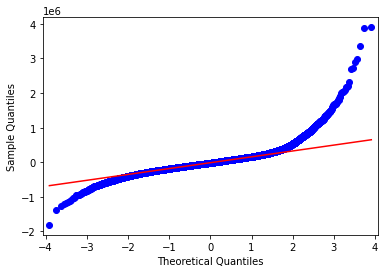

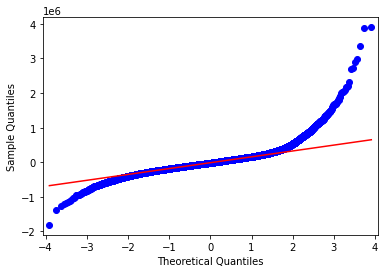

In [93]:
qqplot(dfm.resid, line = 'q')